In [1]:
# Common imports
import pandas as pd
import numpy as np

import scipy as sp

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm2 = ListedColormap(['#0000aa', '#ff2020'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import mglearn

## 1 主成分分析（PCA）

### 1.1 将PCA用于cancer数据集并可视化

PCA最常见的应用之一是将高维数据可视化。

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

In [4]:
m, n = cancer.data.shape  # (569, n)

In [5]:
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

对每个特征分别计算两个类别的直方图。为每个特征建立一个直方图，计算具有某一个特征的数据点在特定范围内（bin）的出现频率。

In [6]:
np.histogram([1, 2, 1], bins=[0, 1, 2])

(array([0, 3], dtype=int64), array([0, 1, 2]))

In [7]:
np.histogram([1, 2, 1], bins=4)

(array([2, 0, 0, 1], dtype=int64), array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ]))

> 间隔（bin）：[1, 1.25), [1.25, 1.5), [1.5, 1.75), [1.75, 2.]  
返回元组第一个值是落在每个间隔的元素个数，第二个值是bins。

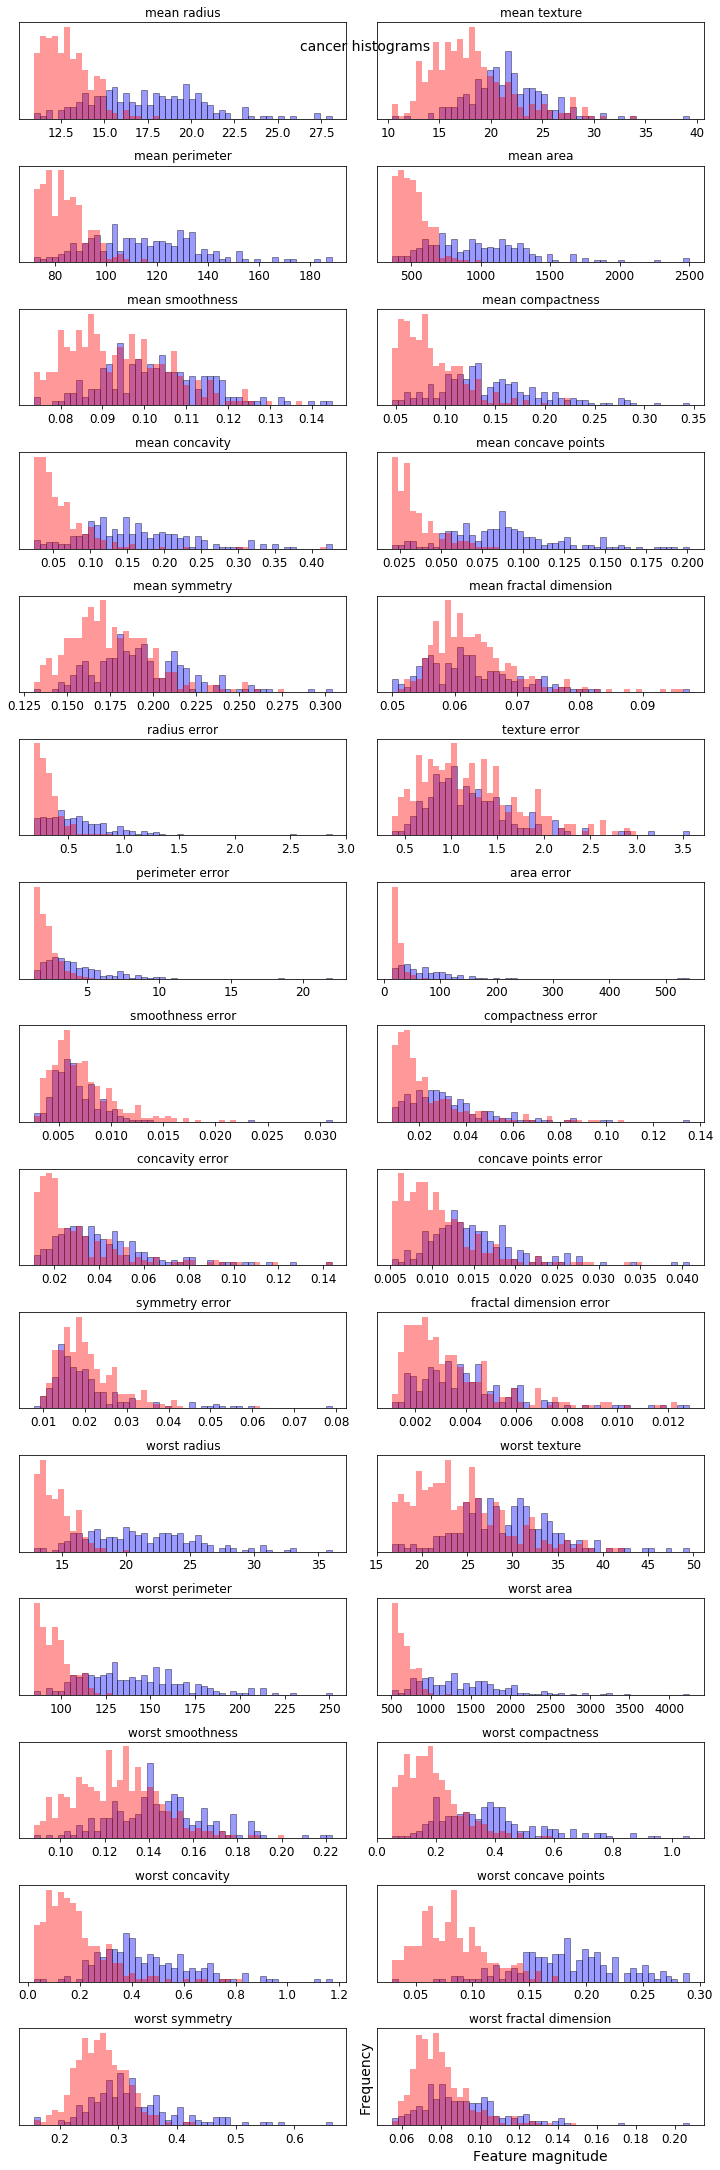

In [8]:
fig, axes = plt.subplots(15, 2, figsize=(10, 30))
ax = axes.ravel()


for i in range(n):  # n特征数，=30
    _, bins = np.histogram(malignant[:, i], bins=50)  # 得到bins
    ax[i].hist(malignant[:, i], bins=bins, color='b', alpha=.4, edgecolor='k')
    ax[i].hist(benign[:, i], bins=bins, color='r', alpha=.4)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
fig.tight_layout()
plt.xlabel("Feature magnitude")
plt.ylabel("Frequency")
plt.suptitle("cancer histograms", fontsize=14)
plt.show()

> 重叠的越少，说明信息量越大。

使用PCA，找到前两个主成分：

In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(cancer.data)

In [10]:
from sklearn.decomposition import PCA

# only keep the first two principal components of the data
pca = PCA(n_components=2, random_state=42)
# Fit PCA model to beast cancer data
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
# Transform the data onto the first two principal components
X_pca = pca.transform(X_scaled)

In [12]:
print("Original shape: {}".format(X_scaled.shape))
print("Reduced shape: {}".format(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


对2个主成分作图：

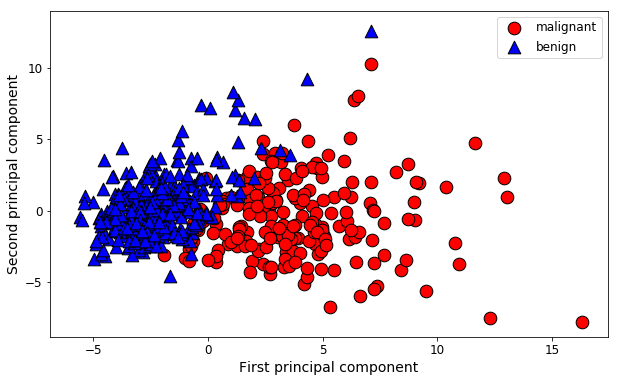

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0][cancer.target == 0], X_pca[:, 1][cancer.target == 0],
            c='r', s=160, edgecolor='k', label="malignant")
plt.scatter(X_pca[:, 0][cancer.target == 1], X_pca[:, 1][cancer.target == 1],
            c='b', s=160, marker='^', edgecolor='k', label="benign")
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)
plt.legend(loc="best", fontsize="large")
plt.show()

PCA的一个缺点是不容易对图中的两个轴进行解释。**主成分对应原始数据中的方向，所以它们是原始特征的组合（组合往往非常复杂）。**

In [14]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

> 每一行对应一个主成分，按重要性排序（第一主成分排在首位）。  
每一列对应数据原始特征属性。

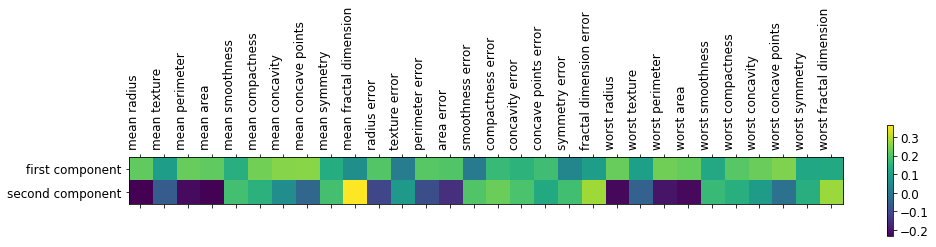

In [15]:
plt.matshow(pca.components_, cmap=plt.cm.viridis)
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(n), cancer.feature_names, rotation=90, ha='right')
plt.show()

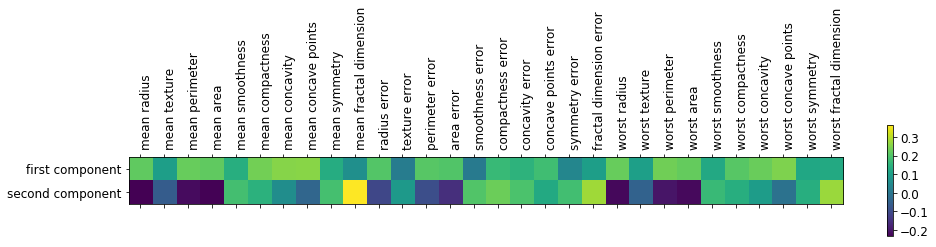

In [16]:
plt.matshow(pca.components_, cmap=plt.cm.viridis)
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(n), cancer.feature_names, rotation=90, ha='left')
plt.show()

In [17]:
# The amount of variance explained by each of the selected components.
# 每个主成分解释的方差量
pca.explained_variance_

array([ 13.30499079,   5.7013746 ])

In [18]:
# Percentage of variance explained by each of the selected components.
# 每个主成分反映了方差的程度
pca.explained_variance_ratio_

array([ 0.44272026,  0.18971182])

In [19]:
# The estimated number of components.
# 主成分数量
pca.n_components

2

### 1.2 特征提取的特征脸

**PCA的另一个应用是特征提取。**

**特征提取**：可以找到一种数据表示，比给定的原始表示更适合于分析。

使用Wild数据集Labeled Faces中的人脸图像(LFW)。使用这些图像的灰度版本，并将它们按比例缩小以加快处理速度。

In [20]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [21]:
people.target.shape

(3023,)

In [22]:
np.unique(people.target, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64),
 array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
         22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
         21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
         41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
         23,  52,  33,  23,  25,  33, 144,  32,  49,  24], dtype=int64))

In [23]:
people.data.shape

(3023, 5655)

In [24]:
people.images.shape

(3023, 87, 65)

In [25]:
# 每张照片大小为87像素x65像素
image_shape = people.images[0].shape
image_shape

(87, 65)

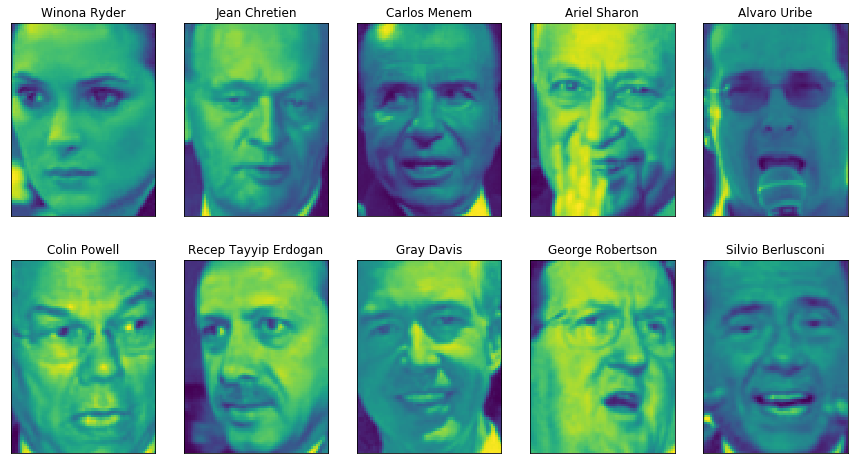

In [26]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.show()

In [27]:
# 每个人出现的次数
people_counts = np.bincount(people.target)
# 将次数与人名联系起来
for i, (count, name) in enumerate(zip(people_counts, people.target_names)):
    print("{0:25}  {1:3}".format(name, count), end='\t')
    if (i + 1) % 2 == 0:
        print()

Alejandro Toledo            39	Alvaro Uribe                35	
Amelie Mauresmo             21	Andre Agassi                36	
Angelina Jolie              20	Ariel Sharon                77	
Arnold Schwarzenegger       42	Atal Bihari Vajpayee        24	
Bill Clinton                29	Carlos Menem                21	
Colin Powell               236	David Beckham               31	
Donald Rumsfeld            121	George Robertson            22	
George W Bush              530	Gerhard Schroeder          109	
Gloria Macapagal Arroyo     44	Gray Davis                  26	
Guillermo Coria             30	Hamid Karzai                22	
Hans Blix                   39	Hugo Chavez                 71	
Igor Ivanov                 20	Jack Straw                  28	
Jacques Chirac              52	Jean Chretien               55	
Jennifer Aniston            21	Jennifer Capriati           42	
Jennifer Lopez              21	Jeremy Greenstock           24	
Jiang Zemin                 20	John Ashcroft           

为降低数据偏斜，对每个人最多只取50张。

In [28]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 将灰度值缩放到0-1之间，而不是在0-255之间，以得到更好的数据稳定性
X_people = X_people / 255.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)

单一最近邻分类器，原则上可以处理每个类别只有一个训练样例的情况。

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

In [31]:
print("Test set score of 1-nn: {}".format(knn_clf.score(X_test, y_test)))

Test set score of 1-nn: 0.2558139534883721


> 想要度量人脸的相似度，计算原始像素空间中的距离是一种相当糟糕的方法。

In [32]:
X_train.shape

(1547, 5655)

In [33]:
# 提取前100个主成分
pca = PCA(n_components=100, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [34]:
pca.explained_variance_ratio_.sum()

0.9028486

> 100个主成分包含了原始数据的90%信息。

In [35]:
X_train_pca.shape

(1547, 100)

In [36]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [37]:
knn_clf.score(X_test_pca, y_test)

0.33139534883720928

In [38]:
# 查看主成分
m, n = pca.components_.shape
print(m, n)

100 5655


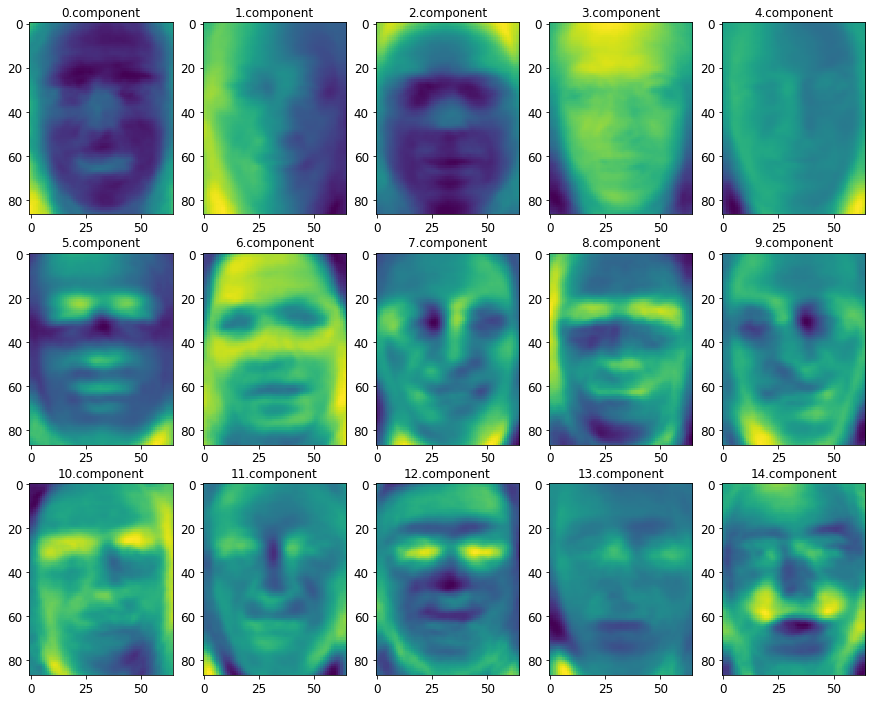

In [39]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12))

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))

plt.show()

## 2 非负矩阵分解NMF

目的：提取有用的信息。试图将每个数据点写成一些分量的加权求和。希望每个分量和系数均为非负。

NMF只能用于每个特征都是非负的数据。

PCA：想要的是正交分量，并且能够解释尽可能多的数据方差。  
NMF：希望分量和系数均为非负。

### 2.1 NMF应用于模拟数据

In [40]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
# Add 8 to maker sure every point lies in the positive part of the space
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2) + 8

In [41]:
from sklearn.decomposition import NMF

In [42]:
nmf = NMF(n_components=2)
nmf.fit(X_blob)
X_nmf = nmf.transform(X_blob)

In [43]:
nmf.components_

array([[ 0.48482499,  3.53313958],
       [ 2.29067631,  0.38745272]])

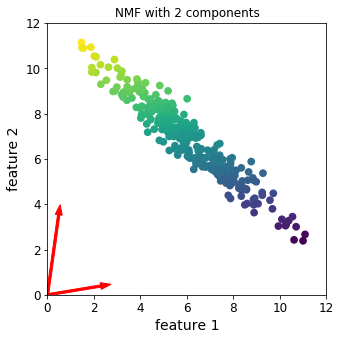

In [44]:
plt.figure(figsize=(5, 5))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=X_nmf[:, 0], linewidths=0,
            s=60, cmap=plt.cm.viridis)
plt.arrow(0, 0, nmf.components_[0][0], nmf.components_[0][1], width=0.1, head_width=.3, color='r')
plt.arrow(0, 0, nmf.components_[1][0], nmf.components_[1][1], width=0.1, head_width=.3, color='r')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.title("NMF with 2 components")
plt.show()

> 对于两个分量的NMF，所有数据都可以写成这两个分量的正数组合。如果有足够多的分量能够完美地重建数据（个数等于特征数），那么算法会选择指向数据极值的方向。

In [45]:
nmf = NMF(n_components=1)
X_nmf = nmf.fit_transform(X_blob)

In [46]:
nmf.components_

array([[ 8.19182416,  9.56885026]])

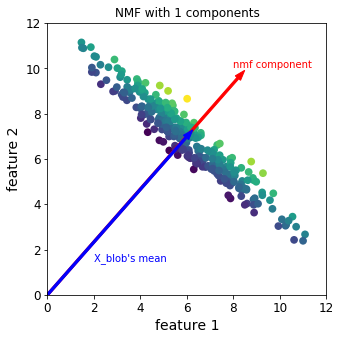

In [47]:
plt.figure(figsize=(5, 5))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=X_nmf[:, 0], linewidths=0,
            s=60, cmap=plt.cm.viridis)
plt.arrow(0, 0, nmf.components_[0][0], nmf.components_[0][1], width=0.1,
          head_width=.3, color='r')
plt.text(8, 10., s="nmf component", color='r')
plt.arrow(0, 0, X_blob.mean(axis=0)[0], X_blob.mean(axis=0)[1], width=0.1,
          head_width=.3, color='b')
plt.text(2., 1.5, s="X_blob's mean", color='b')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.xlim(0, 12)
plt.ylim(0, 12)

plt.title("NMF with 1 components")
plt.show()

> 仅使用一个分量，那么NMF会创建一个指向平均值的分量，因为指向这里会对数据做出最好的解释。  
蓝色箭头是原始数据平均值的方向，红色箭头是分量方向。

In [48]:
X_blob.mean(axis=0)

array([ 5.96135719,  6.94512657])

**与PCA不同，减少分量，NMF不仅会删除一些方向，而且会创建一组完全不同的分量。NMF的分量没有按任何特定方法排序，所有分量的地位平等。**

### 2.2 将NMF应用于人脸图像

In [49]:
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

In [50]:
nmf.components_.shape

(15, 5655)

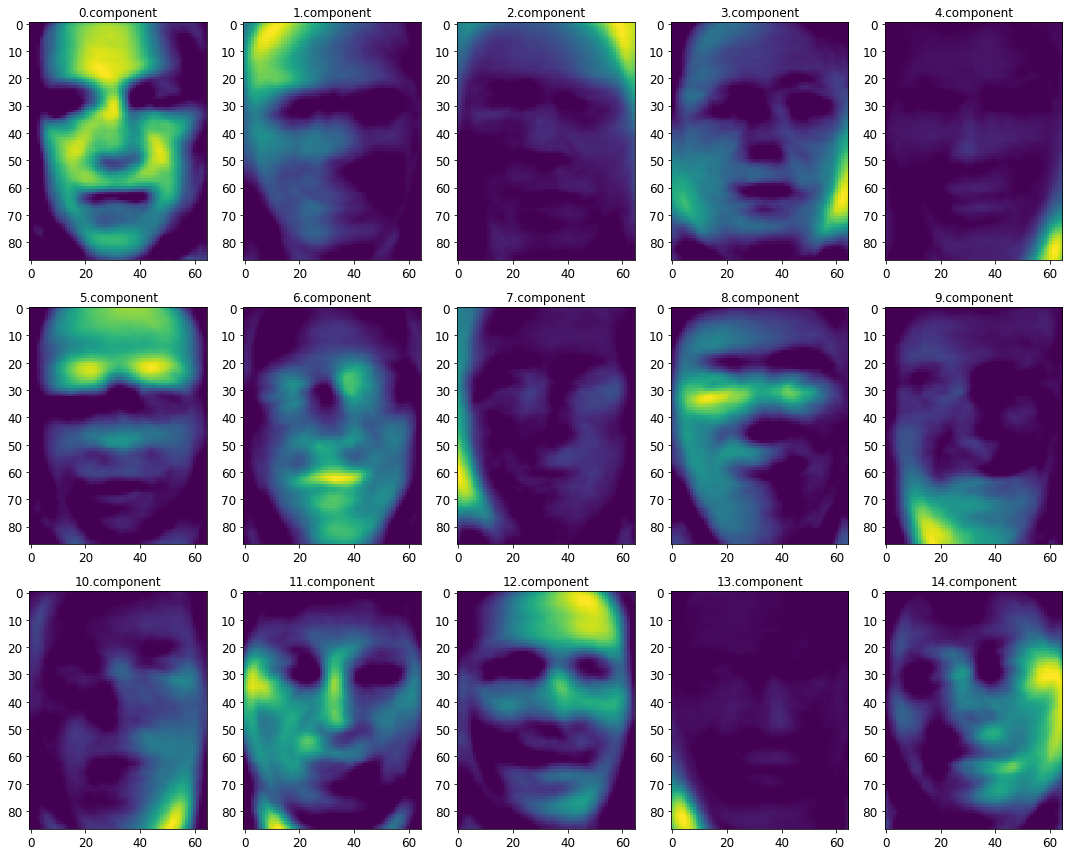

In [51]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12))

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))
fig.tight_layout()
plt.show()

> 这些分量都是正的，比PCA的更像人脸原型。

分量14显示了稍微向左转的人脸：

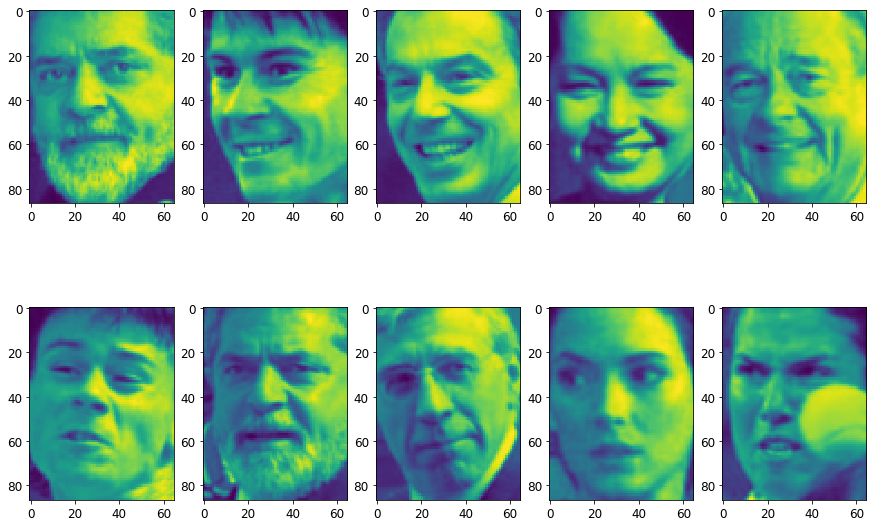

In [52]:
comp = 14
# 按第14个分量排序，绘制前10张图像
inds = np.argsort(X_train_nmf[:, comp])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 10))
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

**NMF通常并不用于对数据进行重建或编码，而是用于在数据中寻找有趣的模型。**

**PCA找到的是重建的最佳方式。**

将数据分解成非负加权求和的过程，对由多个独立源相加或叠加创建而成的数据特别有用。

假设一个信号由三种不同信号源合成：

In [53]:
# fix a random state seed
rng = np.random.RandomState(42)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
# create three signals
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = sp.signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

# concatenate the signals, add noise
S = np.c_[s1, s2, s3]
S += 0.2 * rng.normal(size=S.shape)

S /= S.std(axis=0)  # Standardize data
S -= S.min()

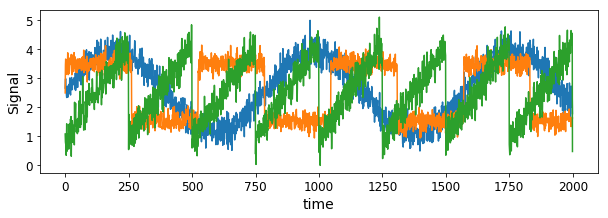

In [54]:
plt.figure(figsize=(10, 3))
plt.plot(S, '-')
plt.xlabel("time")
plt.ylabel("Signal")
plt.show()

In [55]:
S.shape

(2000, 3)

In [56]:
# 将数据混合成100维的状态
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)

In [57]:
X.shape

(2000, 100)

In [58]:
nmf = NMF(n_components=3, random_state=42)
X_nmf = nmf.fit_transform(X)

In [59]:
X_nmf.shape

(2000, 3)

In [60]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

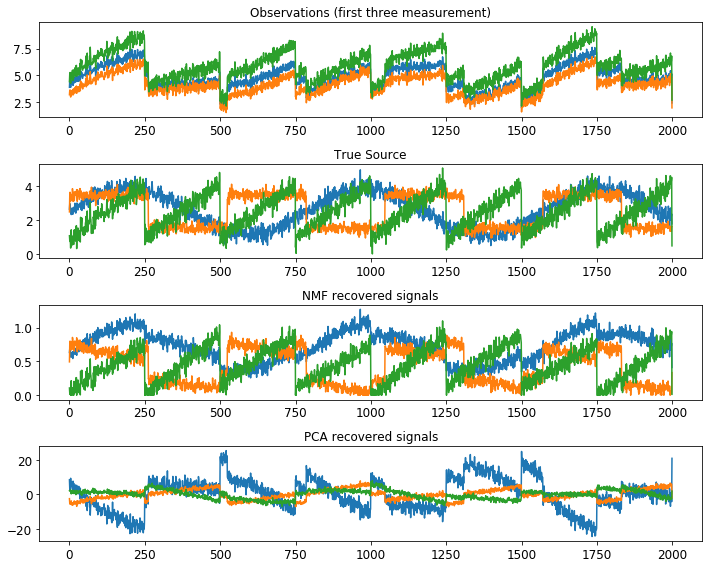

In [61]:
models = [X, S, X_nmf, X_pca]
names = ["Observations (first three measurement)", "True Source",
         "NMF recovered signals", "PCA recovered signals"]
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
for model, name, ax in zip(models, names, axes):
    ax.plot(model[:, :3], '-')
    ax.set_title(name)
fig.tight_layout()

> NMF效果不错。NMF三个分量是没有顺序的，本例中颜色重叠是巧合。

## 3 用t-SNE进行流行学习

t-SNE思想是找到数据的一个二维表示，尽可能地保持数据点之间地距离。TSNE首先给出每个数据点的随机二维表示，然后尝试让在原始特征空间中距离较近的点更加靠近，原始特征空间中相距较远的点更加远离。

重点关注距离较近的点，而不是保持距离较远的点之间的距离。试图保存那些表示哪些点比较靠近的信息。

In [62]:
from sklearn.datasets import load_digits

digits = load_digits()

In [63]:
digits.data.shape

(1797, 64)

In [64]:
digits.images.shape

(1797, 8, 8)

In [65]:
np.unique(digits.target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

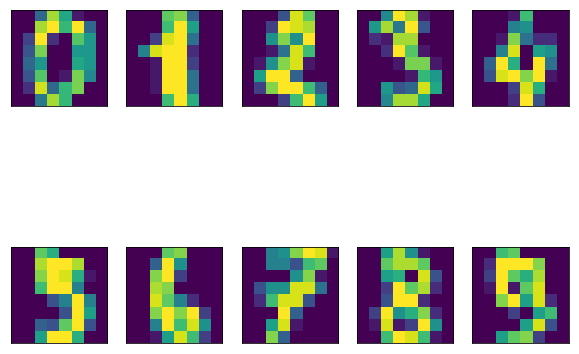

In [66]:
fig, axes = plt.subplots(2, 5, figsize=(10, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [67]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

In [68]:
pca = PCA(n_components=2, random_state=42)
digits_pca = pca.fit_transform(digits.data)

In [69]:
digits_pca.shape

(1797, 2)

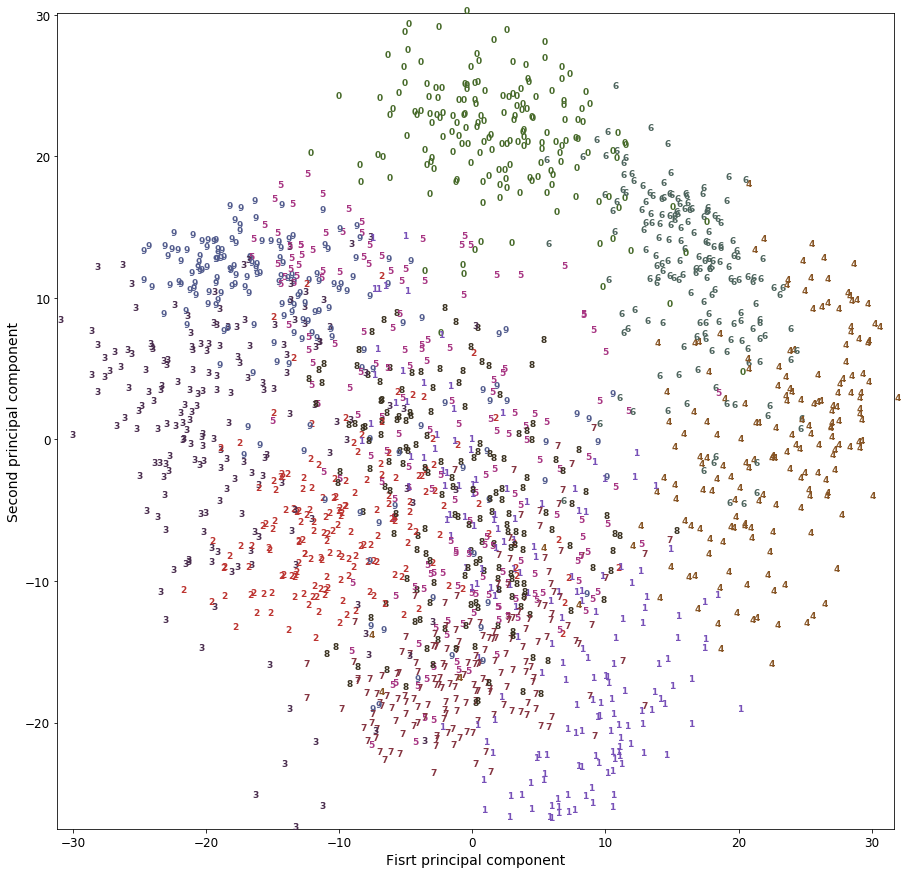

In [70]:
plt.figure(figsize=(15, 15))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_pca[i, 0], digits_pca[i, 1], s=str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Fisrt principal component")
plt.ylabel("Second principal component")
plt.show()

In [71]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
# TSNE没有transform方法
digits_tsne = tsne.fit_transform(digits.data)

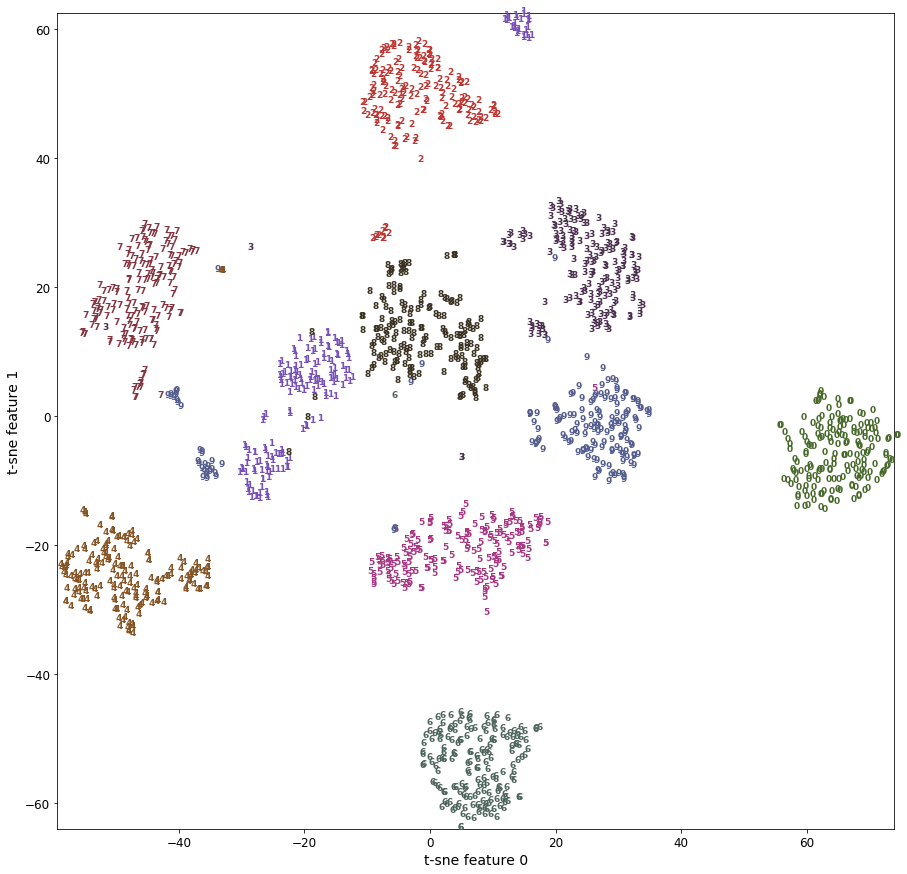

In [72]:
plt.figure(figsize=(15, 15))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], s=str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-sne feature 0")
plt.ylabel("t-sne feature 1")
plt.show()

> 结果非常好，所有类别都被明确分开。1和9被分成几块，但大多数都是密集的。

**TSNE能找到数据的一种二维表示，仅根据原始空间中数据点之间的靠近程度就能够将各个类别明确分开。**